In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem import WordNetLemmatizer, LancasterStemmer
import re
import nltk

In [3]:
df_bit = pd.read_csv('data_bit.csv')

## Bitcoin

In [4]:
df_bit.head()

,Unnamed: 0,id,text,datetime,Location
0,0,1482837567175286790,b'RT @AarikaRhodes: I\xe2\x80\x99m running aga...,2022-01-16 22:10:00,NaN
1,1,1482837566395019267,b'@TheMoonCarl Earn $80 when you sign up at ki...,2022-01-16 22:10:00,NaN
2,2,1482837566143479814,b'Continuing our research on $UNO\xf0\x9f\x94\...,2022-01-16 22:10:00,NaN
3,3,1482837566126800896,"b'Bitcoin subiu :) - R$\xc2\xa0238.809,4 \xc3\...",2022-01-16 22:10:00,NaN
4,4,1482837565644410886,b'RT @AshleyPurdy: \xf0\x9f\x98\xa1 \xf0\x9f\x...,2022-01-16 22:10:00,NaN


In [5]:
mask = df_bit.duplicated(subset=['text'])
df_bit[mask]

,Unnamed: 0,id,text,datetime,Location
10,10,1482837559357190147,b'RT @MeganBitchell: Screaming and crying as a...,2022-01-16 22:09:58,NaN
23,23,1482837540973461504,b'RT @BitcoinMagazine: #Bitcoin https://t.co/z...,2022-01-16 22:09:54,NaN
30,30,1482837528860405761,b'RT @deficonnect: Soon to come...\n\nDELTA7 o...,2022-01-16 22:09:51,NaN
40,40,1482837510065635340,b'RT @deficonnect: Soon to come...\n\nDELTA7 o...,2022-01-16 22:09:46,NaN
43,43,1482837507649716231,b'RT @MeganBitchell: Screaming and crying as a...,2022-01-16 22:09:46,NaN
...,...,...,...,...,...
1975,1975,1482835092368236551,b'RT @jordanbpeterson: Yes. Bitcoin fixes this.',2022-01-16 22:00:10,NaN
1984,1984,1482835083526656000,b'RT @generationofhex: Does $hex go viral in 2...,2022-01-16 22:00:08,NaN
1989,1989,1482835078598344705,b'RT @Bitcoin: https://t.co/14bFOuJOHD',2022-01-16 22:00:07,NaN
1992,1992,1482835077575094274,b'RT @RunOnFlux: $FLUX global network #hashrat...,2022-01-16 22:00:06,NaN


In [6]:
df_bit = df_bit[~mask].reset_index(drop=True)
df_bit.shape

(1317, 5)

In [7]:
df_bit.head()

,Unnamed: 0,id,text,datetime,Location
0,0,1482837567175286790,b'RT @AarikaRhodes: I\xe2\x80\x99m running aga...,2022-01-16 22:10:00,NaN
1,1,1482837566395019267,b'@TheMoonCarl Earn $80 when you sign up at ki...,2022-01-16 22:10:00,NaN
2,2,1482837566143479814,b'Continuing our research on $UNO\xf0\x9f\x94\...,2022-01-16 22:10:00,NaN
3,3,1482837566126800896,"b'Bitcoin subiu :) - R$\xc2\xa0238.809,4 \xc3\...",2022-01-16 22:10:00,NaN
4,4,1482837565644410886,b'RT @AshleyPurdy: \xf0\x9f\x98\xa1 \xf0\x9f\x...,2022-01-16 22:10:00,NaN


In [8]:
df_bit_orig = df_bit.copy()

In [9]:
for tweet in df_bit['text'].sample(5).values:
    print(tweet)

b'RT @balajis: It was easier to start Bitcoin than to reform the Fed.\nIt is easier to start a new city than to reform SF.'
b"@kucoincom #bluesparrow isn't it amazing?\n\xe2\x80\xa2  Daily &amp; weekly &amp; monthly draw\n\xe2\x80\xa2  NFT\n\xe2\x80\xa2  WEB 3\n\xe2\x80\xa2  OWN CEX\n\xe2\x80\xa2  NAME IT \n\xe2\x80\xa2\xe2\x80\xa6 https://t.co/L1uYbZY2Wj"
b'RT @ShibarrowToken: #CAPTAINSHIBARROW NOW ON #CoinMarketCap \xf0\x9f\x98\x8d\n\n#SHIBARROW #BSCGems #BSC #Binance #BinanceSmartChain #BNB #Bitcoin #BTC #Eth\xe2\x80\xa6'
b'\xf0\x9f\x90\x8b #Crypto Whales vs. #Stablecoins \xf0\x9f\x92\xb5\n\n\xf0\x9f\x9a\xa8 Last 4 hours of #BTC-Exchange transactions \xf0\x9f\x9a\xa8\n\nFor clarification:\n#Crypto are\xe2\x80\xa6 https://t.co/89Ip8UraJa'
b'https://t.co/vXjfP8ZHQp\n#bitcoin'


### Put all hashtags into a new column

In [10]:
df_bit['hashtag'] = df_bit['text'].apply(lambda x: re.findall(r"#(\w+)", x))
df_bit.head()

,Unnamed: 0,id,text,datetime,Location,hashtag
0,0,1482837567175286790,b'RT @AarikaRhodes: I\xe2\x80\x99m running aga...,2022-01-16 22:10:00,NaN,[Bitcoin]
1,1,1482837566395019267,b'@TheMoonCarl Earn $80 when you sign up at ki...,2022-01-16 22:10:00,NaN,[]
2,2,1482837566143479814,b'Continuing our research on $UNO\xf0\x9f\x94\...,2022-01-16 22:10:00,NaN,[]
3,3,1482837566126800896,"b'Bitcoin subiu :) - R$\xc2\xa0238.809,4 \xc3\...",2022-01-16 22:10:00,NaN,[]
4,4,1482837565644410886,b'RT @AshleyPurdy: \xf0\x9f\x98\xa1 \xf0\x9f\x...,2022-01-16 22:10:00,NaN,[Bitcoin]


### Remove emojis

In [11]:
df_bit.text = df_bit.text.apply(lambda x: ' '.join([a for a in x.split() if '\\' not in a]))

In [12]:
test = df_bit.text
print(test)

0       b'RT @AarikaRhodes: running against Congressma...
1       b'@TheMoonCarl Earn $80 when you sign up at ki...
2       b'Continuing our research on we dig deeper, It...
3                             b'Bitcoin subiu :) - 19:10'
4                   b'RT @AshleyPurdy: You stop #Bitcoin'
                              ...                        
1312    b'RT @ShibarrowToken: #CAPTAINSHIBARROW NOW ON...
1313    b'RT @NikoJilch: Bitcoin Is Green Energy - by ...
1314    b'#Bitcoin stats every 220.49 last 24h: Fee: h...
1315    b'Fastest: 1 sat/vB Hour: 1 sat/vB 1 sat/vB Fe...
1316    b'Ukraine Demonstrates How Bitcoin Can Transfo...
Name: text, Length: 1317, dtype: object


In [13]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def remove_special_characters(text):
    text = re.sub("@\S+", "", text) #remove mentions
    text = re.sub("https?:\/\/.*[\r\n]*", "", text) #remove hyperlinks
    text = re.sub("#", "", text) #remove hashtag symbol
    text = re.sub('\w*\d\w*', ' ', text) #remove numbers
    text = re.sub("b'RT",'', text) #remove b'RT
    text = re.sub("b'",'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    return text

In [15]:
df_bit.text = df_bit.text.apply(remove_special_characters)

In [16]:
df_bit.head()

,Unnamed: 0,id,text,datetime,Location,hashtag
0,0,1482837567175286790,running against Congressman Brad Sherman wh...,2022-01-16 22:10:00,NaN,[Bitcoin]
1,1,1482837566395019267,Earn when you sign up at kingbitcoi bitcoi...,2022-01-16 22:10:00,NaN,[]
2,2,1482837566143479814,Continuing our research on we dig deeper It l...,2022-01-16 22:10:00,NaN,[]
3,3,1482837566126800896,Bitcoin subiu,2022-01-16 22:10:00,NaN,[]
4,4,1482837565644410886,You stop Bitcoin,2022-01-16 22:10:00,NaN,[Bitcoin]


### Remove digits and lower the text

In [17]:
df_bit.text = df_bit.text.astype(str).str.replace('\d+', '')
df_bit.text = df_bit.text.str.lower()
df_bit.text.head()

/var/folders/bc/c9cbz3vx3k331bfmmjlgtbkm0000gn/T/ipykernel_46399/1368404841.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_bit.text = df_bit.text.astype(str).str.replace('\d+', '')


0      running against congressman brad sherman  wh...
1     earn    when you sign up at kingbitcoi bitcoi...
2    continuing our research on we dig deeper  it l...
3                              bitcoin subiu          
4                                    you stop bitcoin 
Name: text, dtype: object

### Stemming text

In [18]:
from nltk.tokenize import TweetTokenizer

In [19]:
wnl = WordNetLemmatizer()
stemmer = LancasterStemmer()
def lemmatize_text(text):
    text = text.split(' ')
    for i, word in enumerate(text):
        text[i] = wnl.lemmatize(word)   #results for stemming is better lemmatization
        #text[i] = stemmer.stem(word)    
    return ' '.join(text)

In [20]:
df_bit.text = df_bit.text.apply(lemmatize_text)
df_bit.head()

,Unnamed: 0,id,text,datetime,Location,hashtag
0,0,1482837567175286790,running against congressman brad sherman wh...,2022-01-16 22:10:00,NaN,[Bitcoin]
1,1,1482837566395019267,earn when you sign up at kingbitcoi bitcoi...,2022-01-16 22:10:00,NaN,[]
2,2,1482837566143479814,continuing our research on we dig deeper it l...,2022-01-16 22:10:00,NaN,[]
3,3,1482837566126800896,bitcoin subiu,2022-01-16 22:10:00,NaN,[]
4,4,1482837565644410886,you stop bitcoin,2022-01-16 22:10:00,NaN,[Bitcoin]


### Check if there is non-enlighs words and remove them

In [21]:
test = df_bit.text
test

0         running against congressman brad sherman  wh...
1        earn    when you sign up at kingbitcoi bitcoi...
2       continuing our research on we dig deeper  it l...
3                                 bitcoin subiu          
4                                       you stop bitcoin 
                              ...                        
1312      captainshibarrow now on coinmarketcap bscgem...
1313      bitcoin is green energy   by joshua mcconkey...
1314                bitcoin stats every     last    fee  
1315    fastest    sat vb hour    sat vb   sat vb fee ...
1316    ukraine demonstrates how bitcoin can transform...
Name: text, Length: 1317, dtype: object

In [22]:
import nltk
words = set(nltk.corpus.words.words())
keep_words = ['bitcoin', 'ethereum', 'binance','tether','solana','nft']

def keep_eng(text):
    return (" ".join(w for w in nltk.wordpunct_tokenize(text) if w in words or not w.isalpha() or w in keep_words))

In [23]:
df_bit.text = df_bit.text.apply(keep_eng)
print(df_bit.text)

0       running against congressman brad who think bit...
1       earn when you sign up at bitcoin mining you al...
2       our research on we dig it look more solid i ad...
3                                                 bitcoin
4                                        you stop bitcoin
                              ...                        
1312                               now on binance bitcoin
1313                           bitcoin is green energy by
1314                               bitcoin every last fee
1315                 sat hour sat sat fee sat transaction
1316    how bitcoin can transform country bitcoin maga...
Name: text, Length: 1317, dtype: object


### Remove rows containing empty tweets

In [24]:
print(f" There are {np.sum(df_bit.text == '')} rows that now have empty tweets.")

 There are 97 rows that now have empty tweets.


In [25]:
mask = df_bit.text == ''
df_bit[mask]

,Unnamed: 0,id,text,datetime,Location,hashtag
51,57,1482837479589883904,,2022-01-16 22:09:39,NaN,"[cryptocurrency, blockchain, Binance, BNB]"
69,77,1482837446593232903,,2022-01-16 22:09:31,NaN,[]
73,82,1482837436153708549,,2022-01-16 22:09:29,NaN,"[cryptocurrency, blockchain, Binance, BNB, BSCg]"
74,83,1482837434471702533,,2022-01-16 22:09:28,NaN,[]
98,116,1482837394298904579,,2022-01-16 22:09:19,NaN,"[cryptocurrency, blockchain, Binance]"
...,...,...,...,...,...,...
1225,1872,1482835190829527050,,2022-01-16 22:00:33,NaN,[]
1239,1895,1482835173704335364,,2022-01-16 22:00:29,NaN,[]
1261,1926,1482835140346888195,,2022-01-16 22:00:21,NaN,"[hodl, bitcoin]"
1285,1960,1482835104120639492,,2022-01-16 22:00:13,NaN,"[USD, EUR, GBP]"


In [26]:
df_bit = df_bit[~mask]
df_bit.shape

(1220, 6)

### Tokenize the document

In [27]:
stop_words = nltk.corpus.stopwords.words('english')

In [28]:
## CountVectorize
cvec = CountVectorizer(stop_words=stop_words, max_df=7, min_df=3)
doc_word_cv = cvec.fit_transform(df_bit.text)
pd.DataFrame(doc_word_cv.toarray(), index=df_bit.text, columns=cvec.get_feature_names()).head(10)

,accelerate,accept,according,actual,address,advised,ago,ahead,al,almost,...,win,working,write,ya,yeah,yellow,yes,yet,yield,zero
text,,,,,,,,,,,,,,,,,,,,,
running against congressman brad who think bitcoin is the threat to upward mobility when it is our,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
earn when you sign up at bitcoin mining you also stand a chance to earn via referral,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
our research on we dig it look more solid i advise always before you buy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bitcoin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
you stop bitcoin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doge y de token en binance el exchange de,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
follow tag friend our discord nft,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
this account stay a it is the second account will focus more on bitcoin news how to,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
screaming and cry a a six year old trying to explain what bitcoin is to my parent mid divorce,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
##TFIDF
cv_tfidf = TfidfVectorizer(stop_words=stop_words,max_df =0.7, min_df=3)
doc_word_tfidf = cv_tfidf.fit_transform(df_bit.text)
pd.DataFrame(doc_word_tfidf.toarray(), index=df_bit.text, columns=cv_tfidf.get_feature_names()).head(10)

,accelerate,accept,according,actual,address,advised,ago,ahead,airdrop,al,...,write,ya,yeah,year,yellow,yes,yet,yield,zero,zone
text,,,,,,,,,,,,,,,,,,,,,
running against congressman brad who think bitcoin is the threat to upward mobility when it is our,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
earn when you sign up at bitcoin mining you also stand a chance to earn via referral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
our research on we dig it look more solid i advise always before you buy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
bitcoin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
you stop bitcoin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
doge y de token en binance el exchange de,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
follow tag friend our discord nft,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
this account stay a it is the second account will focus more on bitcoin news how to,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
screaming and cry a a six year old trying to explain what bitcoin is to my parent mid divorce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.463837,0.0,0.000000,0.0,0.0,0.0,0.0


In [30]:
doc_word_tfidf.shape

(1220, 462)

In [31]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

### NMF Model

In [32]:
from sklearn.decomposition import NMF, TruncatedSVD

In [33]:
n_topics=10
nmf = NMF(n_components=n_topics)
doc_topic=nmf.fit_transform(doc_word_tfidf)

/Users/Elena/Anaconda/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [34]:
topic_word = pd.DataFrame(nmf.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5",
                     "component_6","component_7","component_8","component_9","component_10"],
             columns = cv_tfidf.get_feature_names())
topic_word

,accelerate,accept,according,actual,address,advised,ago,ahead,airdrop,al,...,write,ya,yeah,year,yellow,yes,yet,yield,zero,zone
component_1,0.003,0.005,0.003,0.000,0.004,0.000,0.005,0.001,0.000,0.003,...,0.003,0.003,0.008,0.011,0.006,0.009,0.006,0.004,0.006,0.000
component_2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.057,...,0.000,0.065,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.015,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.000
component_5,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.027,0.012,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000
component_6,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_7,0.025,0.000,0.011,0.000,0.015,0.025,0.026,0.000,0.003,0.000,...,0.013,0.000,0.000,0.014,0.003,0.024,0.006,0.000,0.000,0.612
component_8,0.003,0.005,0.004,0.027,0.006,0.062,0.005,0.002,0.053,0.000,...,0.006,0.000,0.001,0.073,0.009,0.003,0.013,0.009,0.007,0.000
component_9,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.016,0.000,...,0.000,0.000,0.000,0.026,0.000,0.000,0.000,0.000,0.000,0.000
component_10,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.002,0.006,0.012,...,0.000,0.049,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [35]:
display_topics(nmf, cv_tfidf.get_feature_names(), 10)


Topic  0
bitcoin, bu, ethereum, think, mining, money, future, ha, go, en

Topic  1
daily, web, monthly, weekly, name, stake, code, game, top, market

Topic  2
de, en, la, para, un, binance, follow, plus, sur, son

Topic  3
gift, twitter, deal, doge, present, space, sold, raise, plus, follow

Topic  4
check, amazing, rare, nft, free, launch, sure, let, go, sat

Topic  5
network, pocket, shake, infrastructure, release, press, ethereum, follow, token, buy

Topic  6
buy, wa, around, thing, target, potential, zone, double, bottom, try

Topic  7
price, current, market, change, ha, volume, binance, last, new, time

Topic  8
nft, art, alien, available, ethereum, artist, launch, valeur, binance, sol

Topic  9
el, un, con, la, lo, beach, trade, trading, persona, latest


In [36]:
## among all the topics, topic 9 contains a lot of unexplainanle words
## We need to inspect each topic to better under the content

In [37]:
print(doc_topic[0])

[0.09932926 0.         0.         0.         0.         0.
 0.         0.01577387 0.         0.        ]


In [38]:
df_bit.text.iloc[0]

'running against congressman brad who think bitcoin is the threat to upward mobility when it is our'

In [39]:
df_bit['argmax_topic']=np.argmax(doc_topic, axis=1)
df_bit.argmax_topic.head(10)

0    0
1    0
2    6
3    0
4    0
5    2
6    8
7    0
8    0
9    0
Name: argmax_topic, dtype: int64

In [40]:
pd.Series(df_bit.argmax_topic).value_counts()

0    462
7    309
1    112
2     87
6     78
9     44
8     38
3     35
4     28
5     27
Name: argmax_topic, dtype: int64

In [41]:
###########
# Topic 0 #  ### General fans of Bitcoin
###########

In [42]:
df_bit

,Unnamed: 0,id,text,datetime,Location,hashtag,argmax_topic
0,0,1482837567175286790,running against congressman brad who think bit...,2022-01-16 22:10:00,NaN,[Bitcoin],0
1,1,1482837566395019267,earn when you sign up at bitcoin mining you al...,2022-01-16 22:10:00,NaN,[],0
2,2,1482837566143479814,our research on we dig it look more solid i ad...,2022-01-16 22:10:00,NaN,[],6
3,3,1482837566126800896,bitcoin,2022-01-16 22:10:00,NaN,[],0
4,4,1482837565644410886,you stop bitcoin,2022-01-16 22:10:00,NaN,[Bitcoin],0
...,...,...,...,...,...,...,...
1312,1995,1482835076304052224,now on binance bitcoin,2022-01-16 22:00:06,NaN,"[CAPTAINSHIBARROW, CoinMarketCap, SHIBARROW, B...",0
1313,1996,1482835075691692033,bitcoin is green energy by,2022-01-16 22:00:06,NaN,[],0
1314,1997,1482835075221884935,bitcoin every last fee,2022-01-16 22:00:06,NaN,[Bitcoin],0
1315,1998,1482835074685054983,sat hour sat sat fee sat transaction,2022-01-16 22:00:06,NaN,[],4


In [110]:
df_bit_0=df_bit[df_bit.argmax_topic==0]
df_bit_0.text.iloc[40:60]

81                a we can see is just beginning bitcoin
84                   good one is this related to bitcoin
86                                        gem ne bitcoin
89                                               bitcoin
93     excited to announce taking part of my salary i...
96     love how so many are still so bearish on bitco...
100                                          dev bitcoin
104                              bitcoin freedom dioxide
107               bitcoin gold and inflation with german
108                           bitcoin will make it worse
109                                        since bitcoin
111    retail investor are bitcoin while whale are se...
112                       strike wont support bitcoin in
117           affiliate travel tourism marketing bitcoin
118    same here the long term picture is unchanged o...
123    or to turn in your friend who hold bitcoin and...
126                           bitcoin dip i feel no pain
127    need help calculating an

In [111]:
df_bit_orig.text.iloc[107]

"b'RT @wmiddelkoop: Bitcoin, Gold and Inflation with/mit Willem Middelkoop (English/German) \\n\\nBy @marcfriedrich7 \\n\\nhttps://t.co/98qWEMI42q'"

In [45]:
df_bit_orig.text.iloc[7]

"b'@lewaf @theBTCouple This account stays as it is, the second account will focus more on Bitcoin news, how-to videos\\xe2\\x80\\xa6 https://t.co/vJCKfhoWQI'"

In [107]:
df_bit_orig.text.iloc[1307]

"b'RT @jlrealww: Really Max?  Like mining #bitcoin doesn\\xe2\\x80\\x99t cause #environmentalpollution?  #bitcoin gonna fall hard in the coming weeks.  Sad\\xe2\\x80\\xa6'"

In [47]:
df_bit_orig.text.iloc[1309]

"b'@Antre___ L. Bitcoin and Ethereum aren\\xe2\\x80\\x99t the only crypto. That\\xe2\\x80\\x99s like saying the U.S. is the only country.\\n\\nGo be a\\xe2\\x80\\xa6 https://t.co/gYte400GzX'"

In [48]:
###########
# Topic 1 #  ### Robot accounts to promote a certain website or service
###########

In [49]:
df_bit_1=df_bit[df_bit.argmax_topic==1]
df_bit_1.text.iloc[10:20]

329    b t it daily weekly monthly web own
337    b t it daily weekly monthly web own
352    b t it daily weekly monthly web own
370    b t it daily weekly monthly web own
377    b t it daily weekly monthly web own
389    b t it daily weekly monthly web own
401    b t it daily weekly monthly web own
408    bitcoin up to by game daily code to
412    b t it daily weekly monthly web own
423    b t it daily weekly monthly web own
Name: text, dtype: object

In [50]:
df_bit_orig.text.iloc[329]

'b"@Terri_Bsparrow #bluesparrow isn\'t it amazing?\\n\\xe2\\x80\\xa2  Daily &amp; weekly &amp; monthly draw\\n\\xe2\\x80\\xa2  NFT\\n\\xe2\\x80\\xa2  WEB 3\\n\\xe2\\x80\\xa2  OWN CEX\\n\\xe2\\x80\\xa2  NAME\\xe2\\x80\\xa6 https://t.co/pp5ImzyIWY"'

In [51]:
df_bit_orig.iloc[423]

Unnamed: 0                                                  612
id                                          1482836761994747908
text          b"@Terri_Bsparrow #bluesparrow isn't it amazin...
datetime                                    2022-01-16 22:06:48
Location                                                    NaN
Name: 423, dtype: object

In [52]:
df_bit_1.text.tail(10)

1150    b t it daily weekly monthly web own name it
1158    b t it daily weekly monthly web own name it
1167    b t it daily weekly monthly web own name it
1175    b t it daily weekly monthly web own name it
1183    b t it daily weekly monthly web own name it
1188    b t it daily weekly monthly web own name it
1209    b t it daily weekly monthly web own name it
1220    b t it daily weekly monthly web own name it
1232    b t it daily weekly monthly web own name it
1242    b t it daily weekly monthly web own name it
Name: text, dtype: object

In [53]:
df_bit_orig.iloc[1167]

Unnamed: 0                                                 1784
id                                          1482835289294913538
text          b"@kucoincom #bluesparrow isn't it amazing?\n\...
datetime                                    2022-01-16 22:00:57
Location                                                    NaN
Name: 1167, dtype: object

In [54]:
df_bit_orig.text.iloc[408]

"b'RT @Airdropnotecom: #Bitcoin #crypto #Airdrop\\n\\xf0\\x9f\\x92\\xb0Earn Up to $100 daily\\xf0\\x9f\\x92\\xb0\\n\\nEarn crypto by playing games &amp; completing daily tasks\\n\\nUse code to g\\xe2\\x80\\xa6'"

In [55]:
###########
# Topic 2 #  #### Hispanic/French bitcoin fans
###########

In [56]:
df_bit_2=df_bit[df_bit.argmax_topic==2]
df_bit_2.text.iloc[0:20]

5           doge y de token en binance el exchange de
23                                  en bitcoin follow
32          doge y de token en binance el exchange de
57                           se de a gas natural o de
72                    de ce nft ape valeur de bitcoin
82     excellent plus de la sur front sac inscription
91                          son de de bitcoin y en al
102                           el de la en bajada idea
113               plus gros de twitter a follow t a s
125                           b gar on sur en bitcoin
153                     no de ha a la y a la do de la
155                                bitcoin lo en la y
158                               valor de en dale me
165                  al con bitcoin rotundo de idea y
166                                        la bitcoin
168                                                da
186                el cruce de la de bitcoin a con la
219                            x pour giveaway follow
242                         

In [57]:
df_bit_orig.text.iloc[23]

"b'RT @TxConcours: 1000\\xe2\\x82\\xac en BITCOIN ou paypal\\n\\npour participer : RT + follow moi \\n\\ntirage dans 4jours'"

In [112]:
df_bit_orig.text.iloc[186]

"b'RT @healthy_pockets: Llega el cruce de la muerte  de Bitcoin | \\xc2\\xbfQu\\xc3\\xa9 va a pasar con las Criptomonedas?\\n\\nhttps://t.co/IWSQXdclNe\\n\\n#Bitcoin #B\\xe2\\x80\\xa6'"

In [59]:
df_bit_orig.text.iloc[284]

"b'RT @prestigefrench: ALERTE #CONCOURS ULTRA RAPIDE \\xf0\\x9f\\x9a\\xa8\\n\\n50$ a gagner dans la crypto de ton choix TIRAGE DANS 24H PILE ! \\xe2\\x9c\\x85\\n\\nTu as juste \\xc3\\xa0 RT +\\xe2\\x80\\xa6'"

In [60]:
###########
# Topic 3 #  #### Twitter giveaway: bitcoin platform promotion
###########

In [61]:
df_bit_3=df_bit[df_bit.argmax_topic==3]
df_bit_3.text.iloc[0:30]

19      this is my gift to you that support me every d...
20      gift to pope sold a nft to raise fund for the ...
56                                   bu her ethereum doge
119                                          twitter gift
120                                twitter doge deal gift
122                                          twitter gift
124                             twitter bitcoin deal gift
164     and doge have no correlation other than they a...
233                             present twitter deal gift
234                present bitcoin twitter doge deal gift
355     bumpy ride ahead for bitcoin this week might w...
383                                   twitter bitcoin tip
427                                     twitter gift gift
508                                          twitter gift
510                                          twitter gift
511                             twitter bitcoin deal gift
512                                twitter doge deal gift
548     but pr

In [62]:
df_bit_orig.text.iloc[20]

"b'RT @BTCTN: Gift to Pope Francis sold as #NFT to raise funds for the women and children of #Afghanistan. https://t.co/TZF0uzkp5m'"

In [63]:
df_bit_orig.text.iloc[355]

"b'RT @fx__Nicole: Bumpy ride ahead for Bitcoin this week,might want to delete your Twitter for a while'"

In [64]:
df_bit_orig.text.iloc[1037]

"b'RT @diatomdao: Join us live on Twitter spaces tomorrow on January 17th, 2:30pm CST. \\n\\nWe will be hosting an AMA with the famed billionaire\\xe2\\x80\\xa6'"

In [65]:
###########
# Topic 4 #  ### NFT
###########

In [66]:
df_bit_4=df_bit[df_bit.argmax_topic==4]
df_bit_4.text.iloc[0:20]

99      b i am my free lightning sat from amazing fauc...
130     won over bitcoin in the poll that wa made by i...
224     today we hit and crossed some amazing now in m...
316                                                   let
333     fam that have their make sure to check your wa...
387                      check this amazing nft it a rare
405                      check this amazing nft it a rare
407                                    amazing let go rox
417                      check this amazing nft it a rare
439                      check this amazing nft it a rare
445                      check this amazing nft it a rare
457                      check this amazing nft it a rare
487     be sure to check out our token project which w...
539                      check this amazing nft it a rare
558     today we hit and crossed some amazing now in m...
659                              free ea tested with over
886                      check this amazing nft it a rare
986           

In [67]:
df_bit_orig.text.iloc[99]

'b"I am claiming my free Lightning sats from @_bitcoiner\'s amazing faucet! \\xe2\\x9a\\xa1\\n\\n@boltcoiner unlock me fdf78f48-a156-4730\\xe2\\x80\\xa6 https://t.co/Sm1i4WKXmg"'

In [68]:
df_bit_orig.text.iloc[417]

"b'@emre__art Check this amazing Ape\\xf0\\x9f\\xa6\\x8d NFT \\xf0\\x9f\\xa6\\x8d\\xf0\\x9f\\xa6\\x8d Its a Rare Nft..\\xf0\\x9f\\xa6\\x8d\\xf0\\x9f\\xa6\\x8d\\nhttps://t.co/fIMVmDiazX \\n#nft #nftart #nftartist\\xe2\\x80\\xa6 https://t.co/ArEppQkRan'"

In [69]:
df_bit_orig.text.iloc[558]

"b'Earlier today we hit and crossed some amazing milestones!\\n\\nP2P now in massive adoption!\\nContinue to stay ahead of t\\xe2\\x80\\xa6 https://t.co/qNPvaj83Wb'"

In [70]:
###########
# Topic 5 #   ###Mining/New Crypto
###########

In [71]:
df_bit_5=df_bit[df_bit.argmax_topic==5]
df_bit_5.text.iloc[0:20]

55     flux global network hit a new again in the las...
77     for pocket network shake up infrastructure of the
139    pocket network for shake up infrastructure bit...
268    anon nail bitcoin in early until the network e...
274    after the value of pi network will continue to...
281    why more bitcoin on ethereum than on the light...
390    the current financial system corruption and lo...
411    for pocket network shake up infrastructure of ...
432    for pocket network shake up infrastructure of the
506    for pocket network shake up infrastructure of the
582    for pocket network shake up infrastructure of the
585    for pocket network shake up infrastructure of the
587    for pocket network shake up infrastructure of the
588    for pocket network shake up infrastructure of the
589    for pocket network shake up infrastructure of the
590    for pocket network shake up infrastructure of the
649    follow me for more news for pocket network sha...
682    for pocket network shake

In [72]:
df_bit_orig.text.iloc[55]

"b'RT @RunOnFlux: $FLUX global network #hashrate hits a new ATH again. In the last 30 days, the nethash has increased by almost 120%. #Miners\\xe2\\x80\\xa6'"

In [73]:
df_bit_orig.text.iloc[274]

"b'RT @mstor168: After KYC, the value of Pi network will continue to appreciate with the increase of ecology, and the mining rate will decreas\\xe2\\x80\\xa6'"

In [74]:
df_bit_orig.text.iloc[588]

"b'#Pressrelease #PocketNetwork \\xe2\\x80\\x98AWS for Web3\\xe2\\x80\\x99 Pocket Network Shakes Up Infrastructure of the Internet https://t.co/LozIlSYV3E'"

In [75]:
df_bit_orig.text.iloc[701]

"b'RT @westkripto: \\xf0\\x9f\\x93\\xa3 Arkada\\xc5\\x9flar Legion Network KYC olmadan bedava 50$\\xe2\\x80\\x99a yak\\xc4\\xb1n token da\\xc4\\x9f\\xc4\\xb1t\\xc4\\xb1yor. LITHIUM LAUNCHPAD\\xe2\\x80\\x99de listelenicek \\xf0\\x9f\\x99\\x8c\\nYapman\\xc4\\xb1z ge\\xe2\\x80\\xa6'"

In [76]:
###########
# Topic 6 #  ### Price prediction & investment advices
###########

In [77]:
df_bit_6=df_bit[df_bit.argmax_topic==6]
df_bit_6.text.iloc[0:20]

2      our research on we dig it look more solid i ad...
11     bitcoin potential buy zone wa the h s target a...
15     i wa at and the guy next to me said he is a fu...
41     bitcoin prediction for wa bought for apiece mi...
61     bitcoin option shift ha some bull calling the ...
87                  stop bitcoin gold try to buy instead
90     the last bitcoin daily death cross wa around s...
103    trading volume since which wa also the bottom ...
194    bitcoin potential buy zone wa the h s target a...
215    if this wa an intelligence feint what were we ...
220    the latest bitcoin block with transaction wa j...
221    bitcoin potential buy zone wa the h s target a...
232                        bitcoin wey i go buy go worth
247    bitcoin potential buy zone wa the h s target a...
261    bitcoin potential buy zone wa the h s target a...
296    bitcoin potential buy zone wa the h s target a...
320    our goal bigger than those who manipulate u sa...
321                            

In [78]:
df_bit_orig.text.iloc[2]

"b'Continuing our research on $UNO\\xf0\\x9f\\x94\\x8e\\xf0\\x9f\\x94\\x8e \\n\\nAs we dig deeper, It looks more solid. I advise always DYOR before you buy some\\xe2\\x80\\xa6 https://t.co/SdkHmLzNao'"

In [79]:
df_bit_orig.text.iloc[41]

"b'BITCOIN PREDICTION RESULT\\n\\nSELL 0.1BTC for 43,166.42 USDT.\\nIt was BOUGHT for 43,126.34 USDT apiece 3 min ago on Bin\\xe2\\x80\\xa6 https://t.co/g0nyrcAZcN'"

In [80]:
df_bit_orig.text.iloc[247]

"b'@DoopieCash #bitcoin potentials buy zone was the H&amp;S target around the 42k Same thing: Double bottom reversal\\n\\npote\\xe2\\x80\\xa6 https://t.co/6lSNlMChR6'"

In [81]:
df_bit_orig.text.iloc[365]

'b"RT @TheRealPlanC: It appears that we have a #Bitcoin floor around 40k, make up of \\xf0\\x9f\\x91\\x87\\n\\n\\xe2\\x9c\\x85 HODLers of Last Resort - OG\'s\\n\\nRetail &amp; Institutiona\\xe2\\x80\\xa6"'

In [82]:
###########
# Topic 7 #  ### analysis on price and future growth
###########

In [83]:
df_bit_7=df_bit[df_bit.argmax_topic==7]
df_bit_7.text.iloc[300:320]

1272          bitcoin monthly price on each over the last
1282    b then why do like need to spend s of million ...
1283                stake axion earn the polygon ethereum
1284                                  hourly price update
1297    b we d love for you lot to join u in our new t...
1302                                            the price
1306    family office want asset they can hold for dec...
1310    the company by revenue to be itself for a vent...
1311               bitcoin change the rule few understand
Name: text, dtype: object

In [84]:
df_bit_orig.text.iloc[25]

"b'RT @Cointelegraph: Traders could continue to flow into $NEAR, ATOM, $FTM and FTT if Bitcoin price continues to consolidate over the coming\\xe2\\x80\\xa6'"

In [85]:
df_bit_orig.text.iloc[88]

"b'RT @ouracidworld: So, you prefer short and long giveaways, we will reward you. \\xf0\\x9f\\x8e\\x81\\n\\n\\xe2\\x8f\\xb0 2 hour contest \\xe2\\x8f\\xb0\\n\\n\\xf0\\x9f\\x91\\x89\\xf0\\x9f\\x8f\\xbc RT + Follow @ouracidworld\\n\\xf0\\x9f\\x91\\x80 Tag fr\\xe2\\x80\\xa6'"

In [86]:
df_bit_orig.text.iloc[443]

"b'RT @Breedlove22: In a world where everyone wants to print money, and can print money, the money that nobody can print, wins. That\\xe2\\x80\\x99s why I o\\xe2\\x80\\xa6'"

In [87]:
df_bit_orig.text.iloc[1272]

"b'#Bitcoin monthly price on each 16 over the last year:\\n\\nJan: $42,990\\nDec: $47,833\\nNov: $60,607\\nOct: $60,809\\nSep: $47\\xe2\\x80\\xa6 https://t.co/7BGKUdvAzp'"

In [88]:
###########
# Topic 8 #  #### Art NFT
###########

In [89]:
df_bit_8=df_bit[df_bit.argmax_topic==8]
df_bit_8.text.iloc[21:40]

1078    owner of nft s on bitcoin liquid through invol...
1092                       alien available now on nft art
1121                       alien available now on nft art
1129               nice project i love holder bitcoin nft
1133                              nft art artist ethereum
1146                       alien available now on nft art
1156                       alien available now on nft art
1181                       alien available now on nft art
1184                              nft art artist ethereum
1192                  bitcoin ethereum ripple nft binance
1211                       alien available now on nft art
1253                       alien available now on nft art
1268    the of missing driving this whole nft thing so...
1280                    legendary warp launch bitcoin nft
1296    best to buy in rock punk the real original nft...
1300                       alien available now on nft art
1301                                          sol nft sol
Name: text, dt

In [90]:
df_bit_orig.text.iloc[150]

'b"@mikemajlak thinking about turning this art piece I did last year and you shared to your story on IG.. thinking it\'\\xe2\\x80\\xa6 https://t.co/mjju4P9QkN"'

In [91]:
df_bit_orig.text.iloc[778]

"b'Alien #82 available Now on @opensea \\xf0\\x9f\\x91\\xbd\\n\\n#nftart #nft #nftartist #art #digitalart #nftcommunity #nfts #cryptoart\\xe2\\x80\\xa6 https://t.co/nO0ywzhVZY'"

In [92]:
df_bit_orig.text.iloc[1296]

"b'Best #NFTCollection to Buy in 2022\\n\\nHARD ROCK PUNKS NFT\\n- The Real Original NFT -\\n\\nOnly 10K Original #HardRockPunks\\xe2\\x80\\xa6 https://t.co/OEIsAFzXQG'"

In [93]:
###########
# Topic 9 #  ### Introducing bitcoin related twitter account, El Salvador buying 410 new BTC drove the spanish community
###########

In [94]:
df_bit_9=df_bit[df_bit.argmax_topic==9]
df_bit_9.text.iloc[30:50]

789                        bitcoin no bien lo con la y el
869                                  trading soon on poly
919     straight el and dropping relentless bitcoin op...
924                                       b let s trading
929                                    trading investment
936            el bitcoin rainbow price chart se en de el
951     wa to bitcoin quote is from today el is the mi...
981                                                ama da
982                                                 el un
1127                        la me de el doge era un token
1153                                                  fed
1187                                     y lo con bitcoin
1208                                el prof bitcoin er no
1217                       el call of rata si te a y a al
Name: text, dtype: object

In [95]:
df_bit_orig.text.iloc[203]

"b'RT @maxkeiser: Sunset in El Zonte #BITCOIN BEACH w/ @jimmysong https://t.co/3KwDQ9LYeq'"

In [96]:
df_bit_orig.text.iloc[438]

"b'@Bitcoin_Martian @Yikibe Closing the gap on wealth inequality is not an idea exclusive to progressives. It\\xe2\\x80\\x99s how th\\xe2\\x80\\xa6 https://t.co/hdXBXEuHBd'"

In [97]:
df_bit_orig.text.iloc[869]

"b'RT @usakenshin: Trading Soon On BSC/POLY/AVAX \\xf0\\x9f\\xa4\\x9f\\xf0\\x9f\\x91\\x8c\\nWebsite: https://t.co/jYQ4kof9iU\\n\\xf0\\x9f\\xa4\\x9f\\xf0\\x9f\\x91\\x8c\\n@wolfofcryptoBLV\\n@RBXSAMURAI\\n@RBXtoken\\n#BTC\\xc2\\xa0 #BNB\\xc2\\xa0 #RB\\xe2\\x80\\xa6'"

In [98]:
df_bit_orig.text.iloc[951]

"b'RT @stacyherbert: Bukele was destined to bitcoin \\n\\nThis quote is from 2012\\n\\nAnd today, El Salvador is attracting the greatest minds to move\\xe2\\x80\\xa6'"

### CorEx Model

In [103]:
from corextopic import corextopic as ct
from corextopic import vis_topic as vt
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
words = list(np.asarray(cvec.get_feature_names()))
topic_model = ct.Corex(n_hidden=10, words=words,
                       max_iter=200, verbose=False, seed=1)

topic_model.fit(doc_word_cv, words=words)

# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: bank,move,bear,card,hey,user,central,system,first,giant
1: help,pay,man,million,sure,polygon,post,tax,mine,comment
2: friend,run,different,tag,whole,believe,goal,mean,either,especially
3: possible,probability,must,government,trend,something,rising,pushing,pull,plug
4: transaction,win,ago,billion,true,cost,catch,prediction,total,correct
5: say,watch,inflation,call,german,guess,hedge,thought,plan,hoy
6: look,taking,come,hex,heart,literally,life,technology,luck,research
7: try,instead,bought,yield,die,closed,video,already,sound,core
8: reward,solana,owner,referral,sol,link,animal,south,end
9: use,yes,impact,fix,stock,biggest,gem,starting,dev,line


### K-Means Clustering

In [105]:
from sklearn.cluster import KMeans

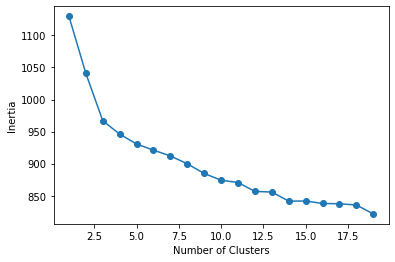

In [106]:
inertia = []
list_num_clusters = list(range(1,20))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters, max_iter=200, n_init=10)
    km.fit(doc_word_tfidf)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');